In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import pickle

df_train = pd.read_pickle("../2. Data Preprocessing/processed_data")
df_train.columns = [x[0] for x in df_train.columns]
print(df_train.columns.values)
# print(df_train)

# df_train2 = pd.read_csv('../2. Data Preprocessing/tmdb_All_movies.csv')
# print(df_train2)

# Obtain id column
# print(df_train["idid"])
df_train.rename(columns={'idid': 'id'}, inplace=True)
# print(df_train["id"])
df_id = df_train["id"].iloc[:,0:1]
# print(df_id)

['budget' 'music' 'drama' ... 'mona friis bertheussen' 'brian holden'
 'norman stone']
           id
0      480024
1      480035
2      480087
3      480123
4      480206
5      480210
6      480245
7      480285
8      480288
9      480382
10     480402
11     480434
12     480444
13     480448
14     480456
15     480513
16     480530
17     480561
18     480562
19     480566
20     480572
21     480609
22     480669
23     480682
24     480708
25     480718
26     480782
27     480784
28     480794
29     480873
...       ...
23549  238143
23550  238156
23551  238349
23552  238486
23553  238603
23554  238622
23555  238640
23556  238713
23557  238720
23558  238751
23559  238811
23560  238891
23561  238909
23562  239114
23563  239136
23564  239145
23565  239231
23566  239274
23567  239313
23568  239328
23569  239374
23570  239434
23571  239441
23572  239571
23573  239573
23574  239602
23575  239670
23576  239874
23577  239895
23578  239971

[23579 rows x 1 columns]


In [55]:
# Check the columns using dtypes
print(df_train.dtypes)
df_train.shape

budget                      int64
music                       int64
drama                       int64
horror                      int64
documentary                 int64
thriller                    int64
comedy                      int64
crime                       int64
western                     int64
romance                     int64
animation                   int64
family                      int64
tv movie                    int64
war                         int64
mystery                     int64
action                      int64
fantasy                     int64
adventure                   int64
science fiction             int64
history                     int64
idid                        int64
weekday                   float64
day                       float64
month                     float64
year                      float64
revenue                   float64
runtime                   float64
status                     object
title                      object
vote_average  

(23579, 11938)

In [13]:
# New df for non-text columns
df = df_train.loc[:,["budget", "revenue", "weekday", "day", "month", "year", "runtime", "vote_average", "vote_count", "weighted_rating"]]
df = pd.concat([df, df_id], axis=1)
# Excluded title and status

# # Remove rows where revenue = 0
# df = df[df.revenue != 0]
# # Remove rows where year < 1980
# df = df[df.year >= 1980]

# total number of rows and columns
print(df.shape)

# Check datatypes
# df = df.astype({'revenue':'float64'})
df = df.astype(float)
print(df.dtypes)

# Randomly sample 5 records with .sample(5)
df.sample(999)
# print(df)

(23579, 11)
budget             float64
revenue            float64
weekday            float64
day                float64
month              float64
year               float64
runtime            float64
vote_average       float64
vote_count         float64
weighted_rating    float64
id                 float64
dtype: object


,budget,revenue,weekday,day,month,year,runtime,vote_average,vote_count,weighted_rating,id
10011,0.0,131060248.0,3.0,1.0,1.0,2014.0,NaN,0.0,0.0,7.000000,323446.0
4167,0.0,109000.0,3.0,9.0,2.0,1977.0,29.0,0.0,0.0,7.000000,381913.0
16209,0.0,395600.0,7.0,31.0,12.0,2006.0,89.0,7.3,22.0,7.000264,15325.0
12957,0.0,387396.0,5.0,29.0,9.0,2006.0,111.0,8.0,19.0,7.000759,5850.0
17311,32000000.0,27635305.0,3.0,25.0,11.0,2009.0,111.0,6.9,1758.0,6.993430,20766.0
12051,130000000.0,211643158.0,2.0,3.0,5.0,2005.0,144.0,6.7,1951.0,6.978283,1495.0
720,0.0,84300.0,5.0,23.0,2.0,2018.0,116.0,0.0,0.0,7.000000,501255.0
7468,0.0,2504465.0,7.0,1.0,1.0,2017.0,21.0,10.0,1.0,7.000120,467029.0
1726,0.0,3700.0,6.0,7.0,7.0,2018.0,83.0,0.0,0.0,7.000000,530386.0
17592,0.0,17448000.0,5.0,16.0,1.0,1987.0,104.0,6.0,32.0,6.998722,23599.0


In [83]:
# Get summary statistics using .describe()
df.describe()
#df_train[["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].describe()

,budget,revenue,weekday,day,month,year,runtime,vote_average,vote_count,weighted_rating
count,2.357900e+04,2.357900e+04,22561.000000,22561.000000,22561.000000,22561.000000,2.126200e+04,23579.000000,23579.000000,23579.000000
mean,1.065739e+07,1.908478e+14,4.213111,13.893932,6.274589,1999.368955,1.970529e+03,4.345782,237.647780,6.998824
std,3.507535e+07,2.930555e+16,1.610958,9.326888,3.646406,19.845593,2.743197e+05,3.077040,918.773307,0.024323
min,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1887.000000,1.000000e+00,0.000000,0.000000,6.708784
25%,0.000000e+00,1.000000e+05,3.000000,6.000000,3.000000,1992.000000,8.100000e+01,0.000000,0.000000,6.999201
50%,0.000000e+00,3.840800e+06,5.000000,13.000000,6.000000,2006.000000,9.500000e+01,5.600000,4.000000,7.000000
75%,6.650000e+06,3.383076e+07,5.000000,22.000000,9.000000,2014.000000,1.090000e+02,6.700000,72.000000,7.000000
max,3.500050e+09,4.500000e+18,7.000000,31.000000,12.000000,2029.000000,4.000000e+07,10.000000,19042.000000,7.584377


In [84]:
# Missing Values Summary
# total row counts
# df['revenue'].value_counts()
print(df.count())

# NaN values count
print(df.isna().sum())

# Zero values count
print((df == 0).sum())

# df = df.fillna(0)

budget             23579
revenue            23579
weekday            22561
day                22561
month              22561
year               22561
runtime            21262
vote_average       23579
vote_count         23579
weighted_rating    23579
dtype: int64
budget                0
revenue               0
weekday            1018
day                1018
month              1018
year               1018
runtime            2317
vote_average          0
vote_count            0
weighted_rating       0
dtype: int64
budget             14345
revenue                0
weekday                0
day                    0
month                  0
year                   0
runtime                0
vote_average        7130
vote_count          7087
weighted_rating        0
dtype: int64


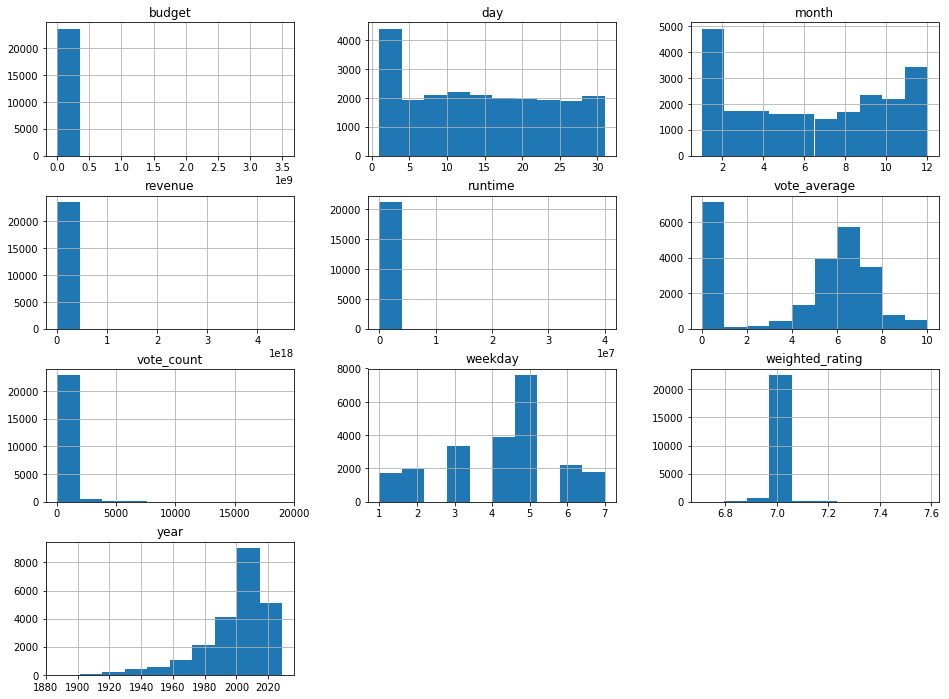

In [85]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,12]
# Plot histograms for all attributes
df.hist()
plt.show()

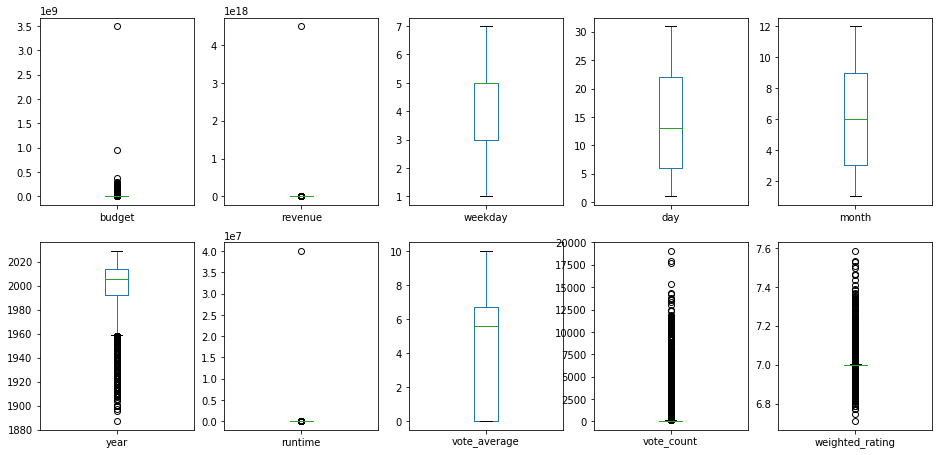

In [87]:
# Set the size of the figure
# Plot boxplots for all attributes

plt.rcParams["figure.figsize"] = [16,20]
df.plot(kind='box', subplots=True, layout=(5,5))
plt.show()

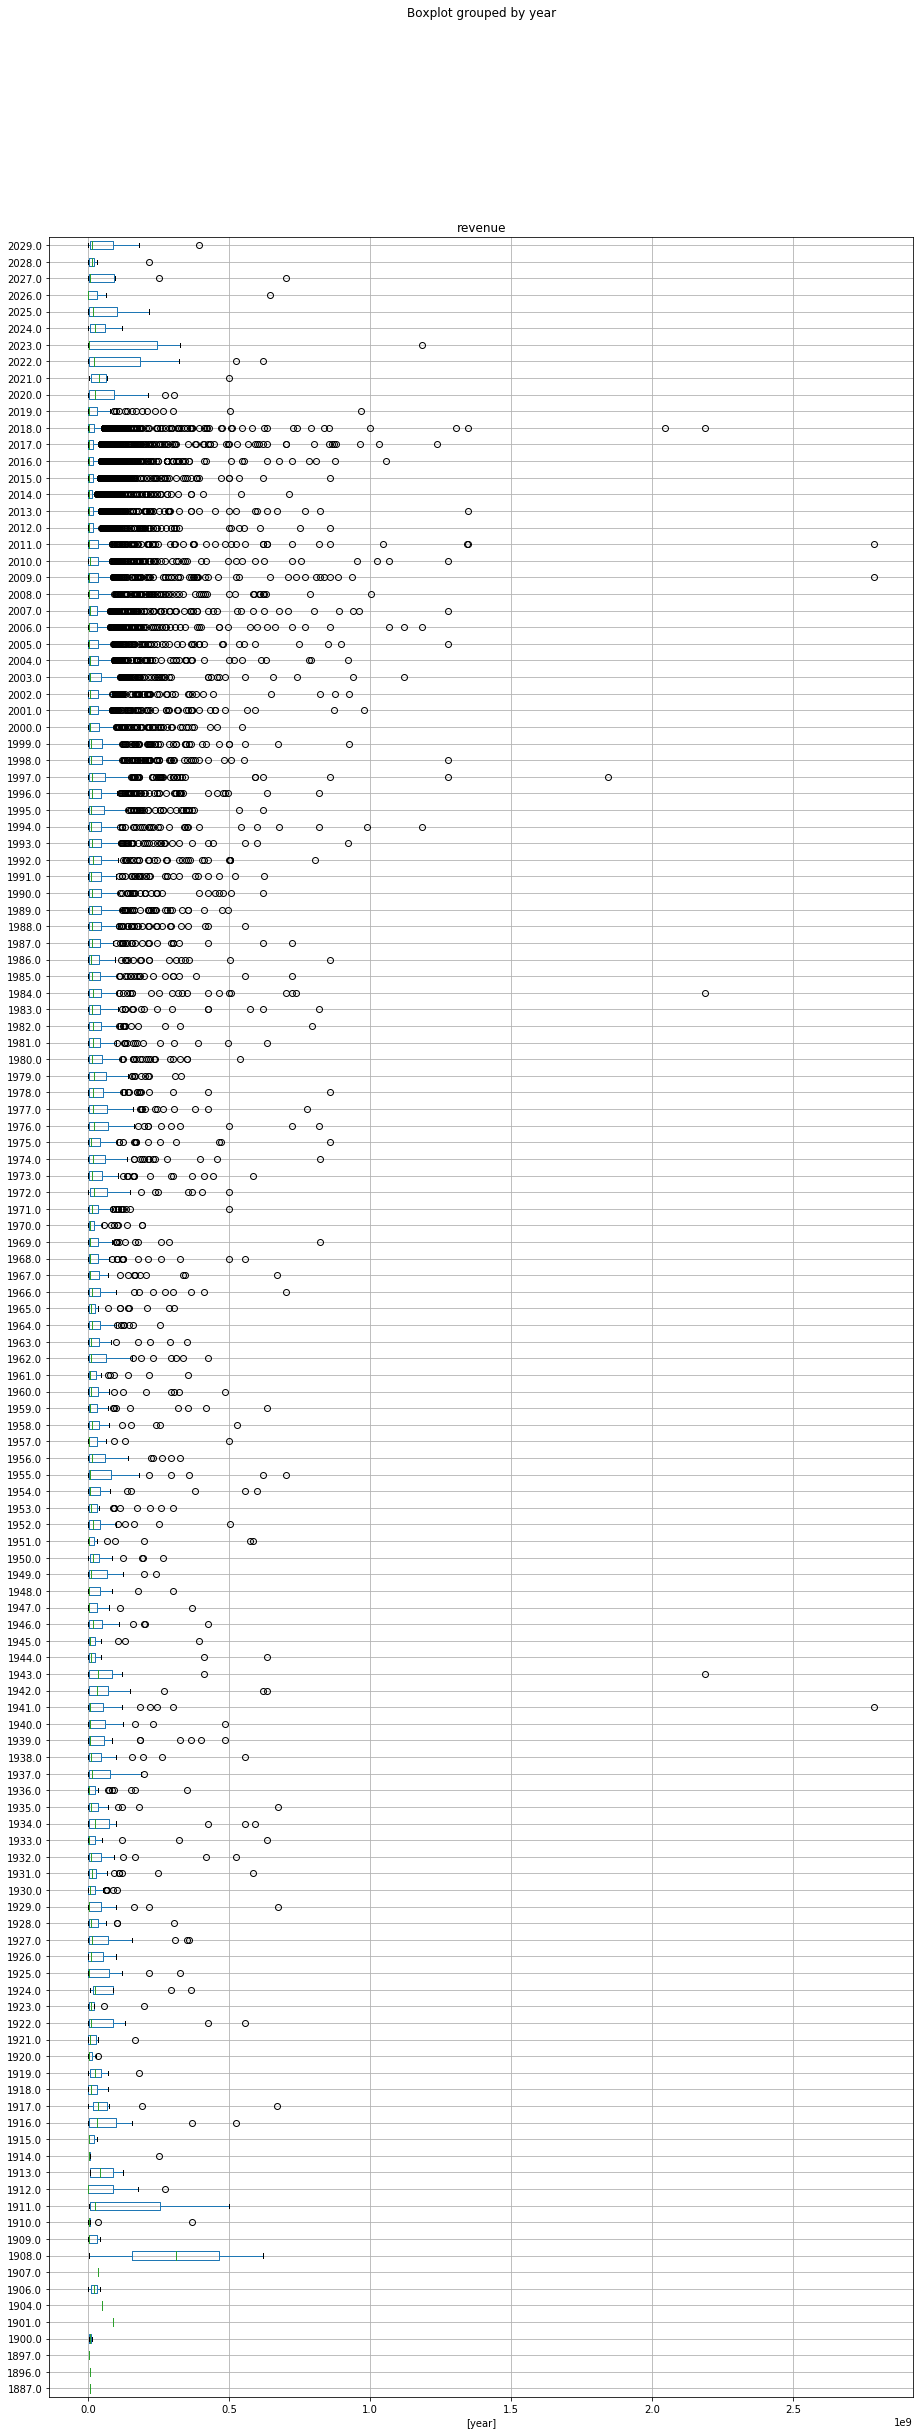

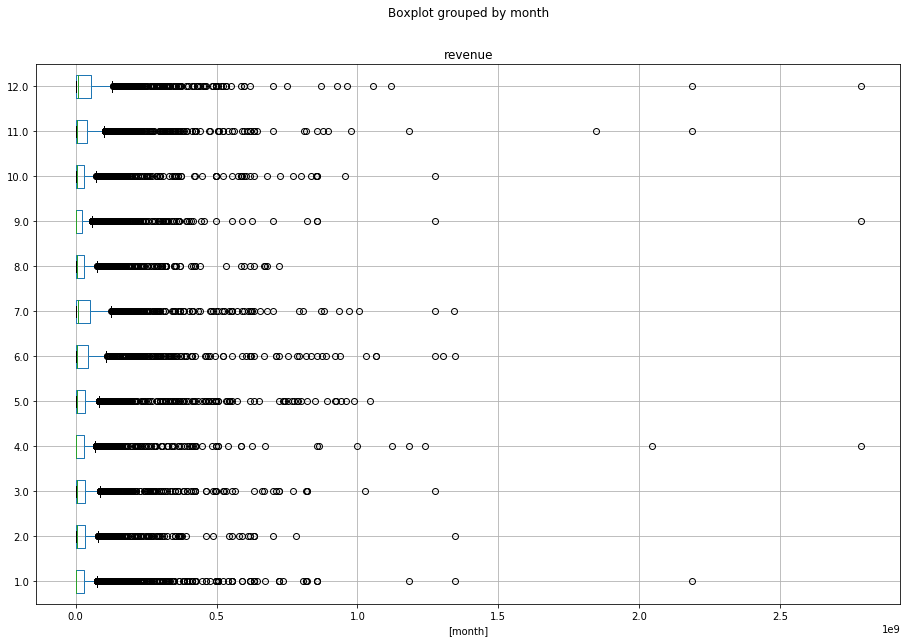

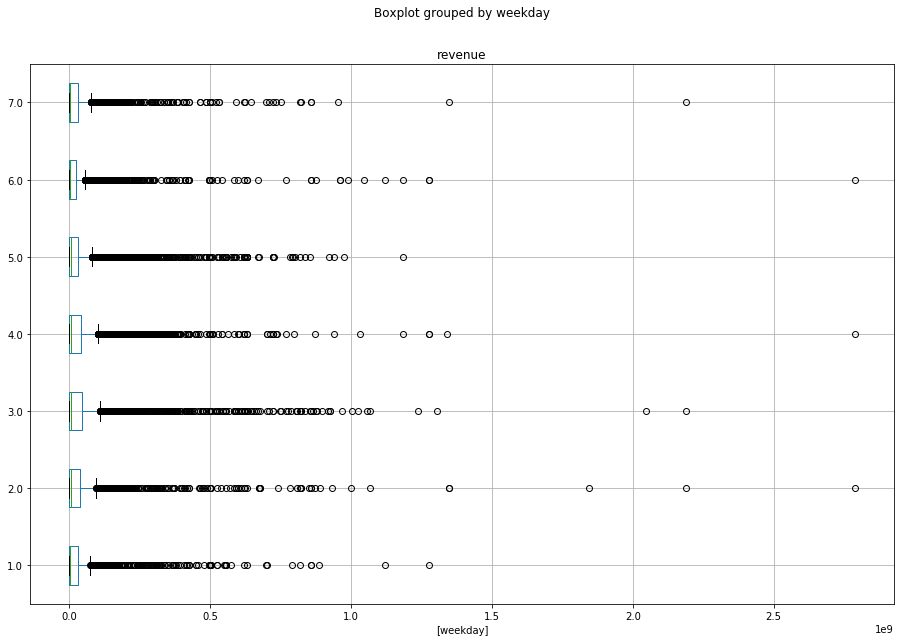

In [88]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 40]
# Plot a boxplot for a specific attributes
df[['revenue', "year"]].boxplot(vert=False, by='year')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue', "month"]].boxplot(vert=False, by='month')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue',"weekday"]].boxplot(vert=False, by='weekday')
plt.show()

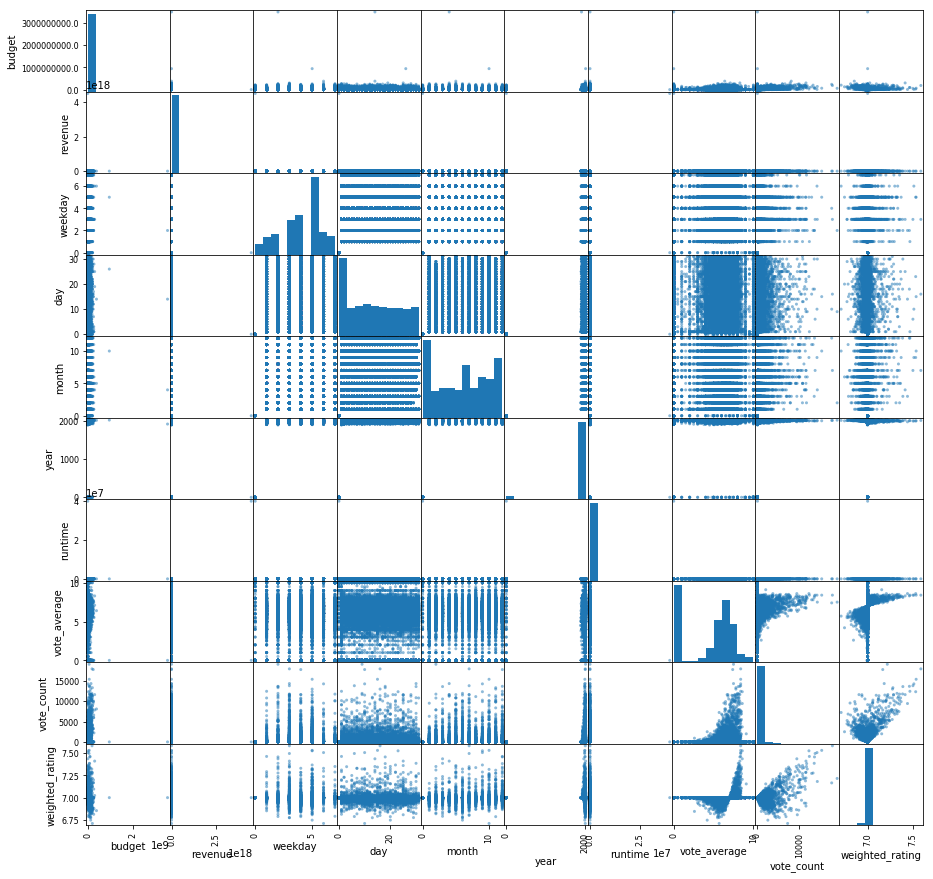

In [96]:
# Set the size of the figure
# Plot correlation scatter matrix

pd.scatter_matrix(df, figsize=(15, 15))
plt.show()

In [90]:
df.corr()

,budget,revenue,weekday,day,month,year,runtime,vote_average,vote_count,weighted_rating
budget,1.000000,-0.001979,-0.017189,0.021088,0.030534,0.023206,-0.001965,0.057132,0.331603,-0.063219
revenue,-0.001979,1.000000,-0.014639,-0.009066,-0.010322,-0.030624,1.000000,-0.009198,-0.001685,0.000315
weekday,-0.017189,-0.014639,1.000000,0.152382,0.157571,0.478072,-0.014614,0.131002,-0.005111,-0.015512
day,0.021088,-0.009066,0.152382,1.000000,0.248032,0.297364,-0.009036,0.163601,0.059253,-0.007002
month,0.030534,-0.010322,0.157571,0.248032,1.000000,0.337553,-0.010286,0.185324,0.078518,0.025123
year,0.023206,-0.030624,0.478072,0.297364,0.337553,1.000000,-0.030582,0.226947,0.056703,-0.012899
runtime,-0.001965,1.000000,-0.014614,-0.009036,-0.010286,-0.030582,1.000000,-0.009113,-0.001650,0.000319
vote_average,0.057132,-0.009198,0.131002,0.163601,0.185324,0.226947,-0.009113,1.000000,0.215716,0.043813
vote_count,0.331603,-0.001685,-0.005111,0.059253,0.078518,0.056703,-0.001650,0.215716,1.000000,0.391317
weighted_rating,-0.063219,0.000315,-0.015512,-0.007002,0.025123,-0.012899,0.000319,0.043813,0.391317,1.000000


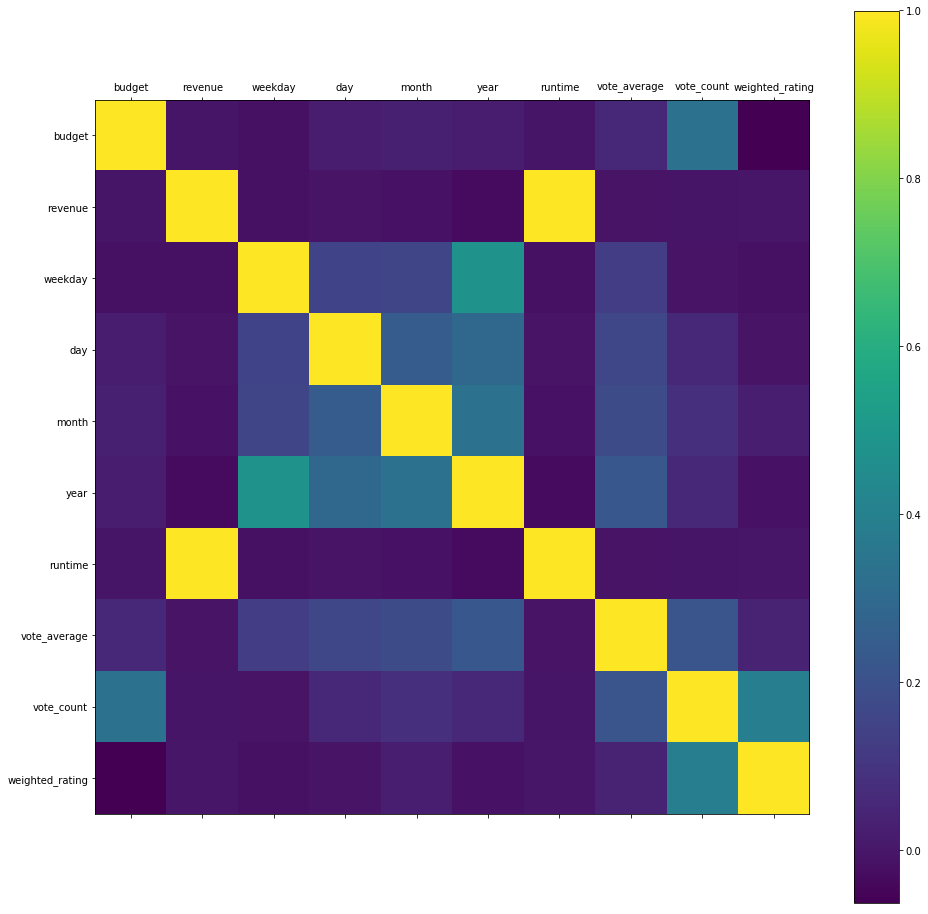

In [91]:
# Correlation matrix plot
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

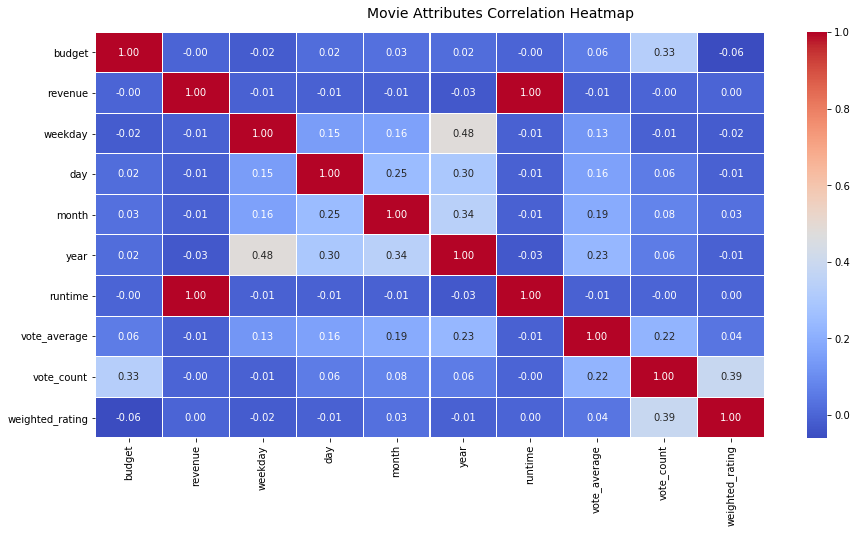

In [93]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

In [97]:
#descriptive statistics summary - sub in values to try
df['revenue'].describe()

count    2.357900e+04
mean     1.908478e+14
std      2.930555e+16
min      1.000000e+00
25%      1.000000e+05
50%      3.840800e+06
75%      3.383076e+07
max      4.500000e+18
Name: revenue, dtype: float64

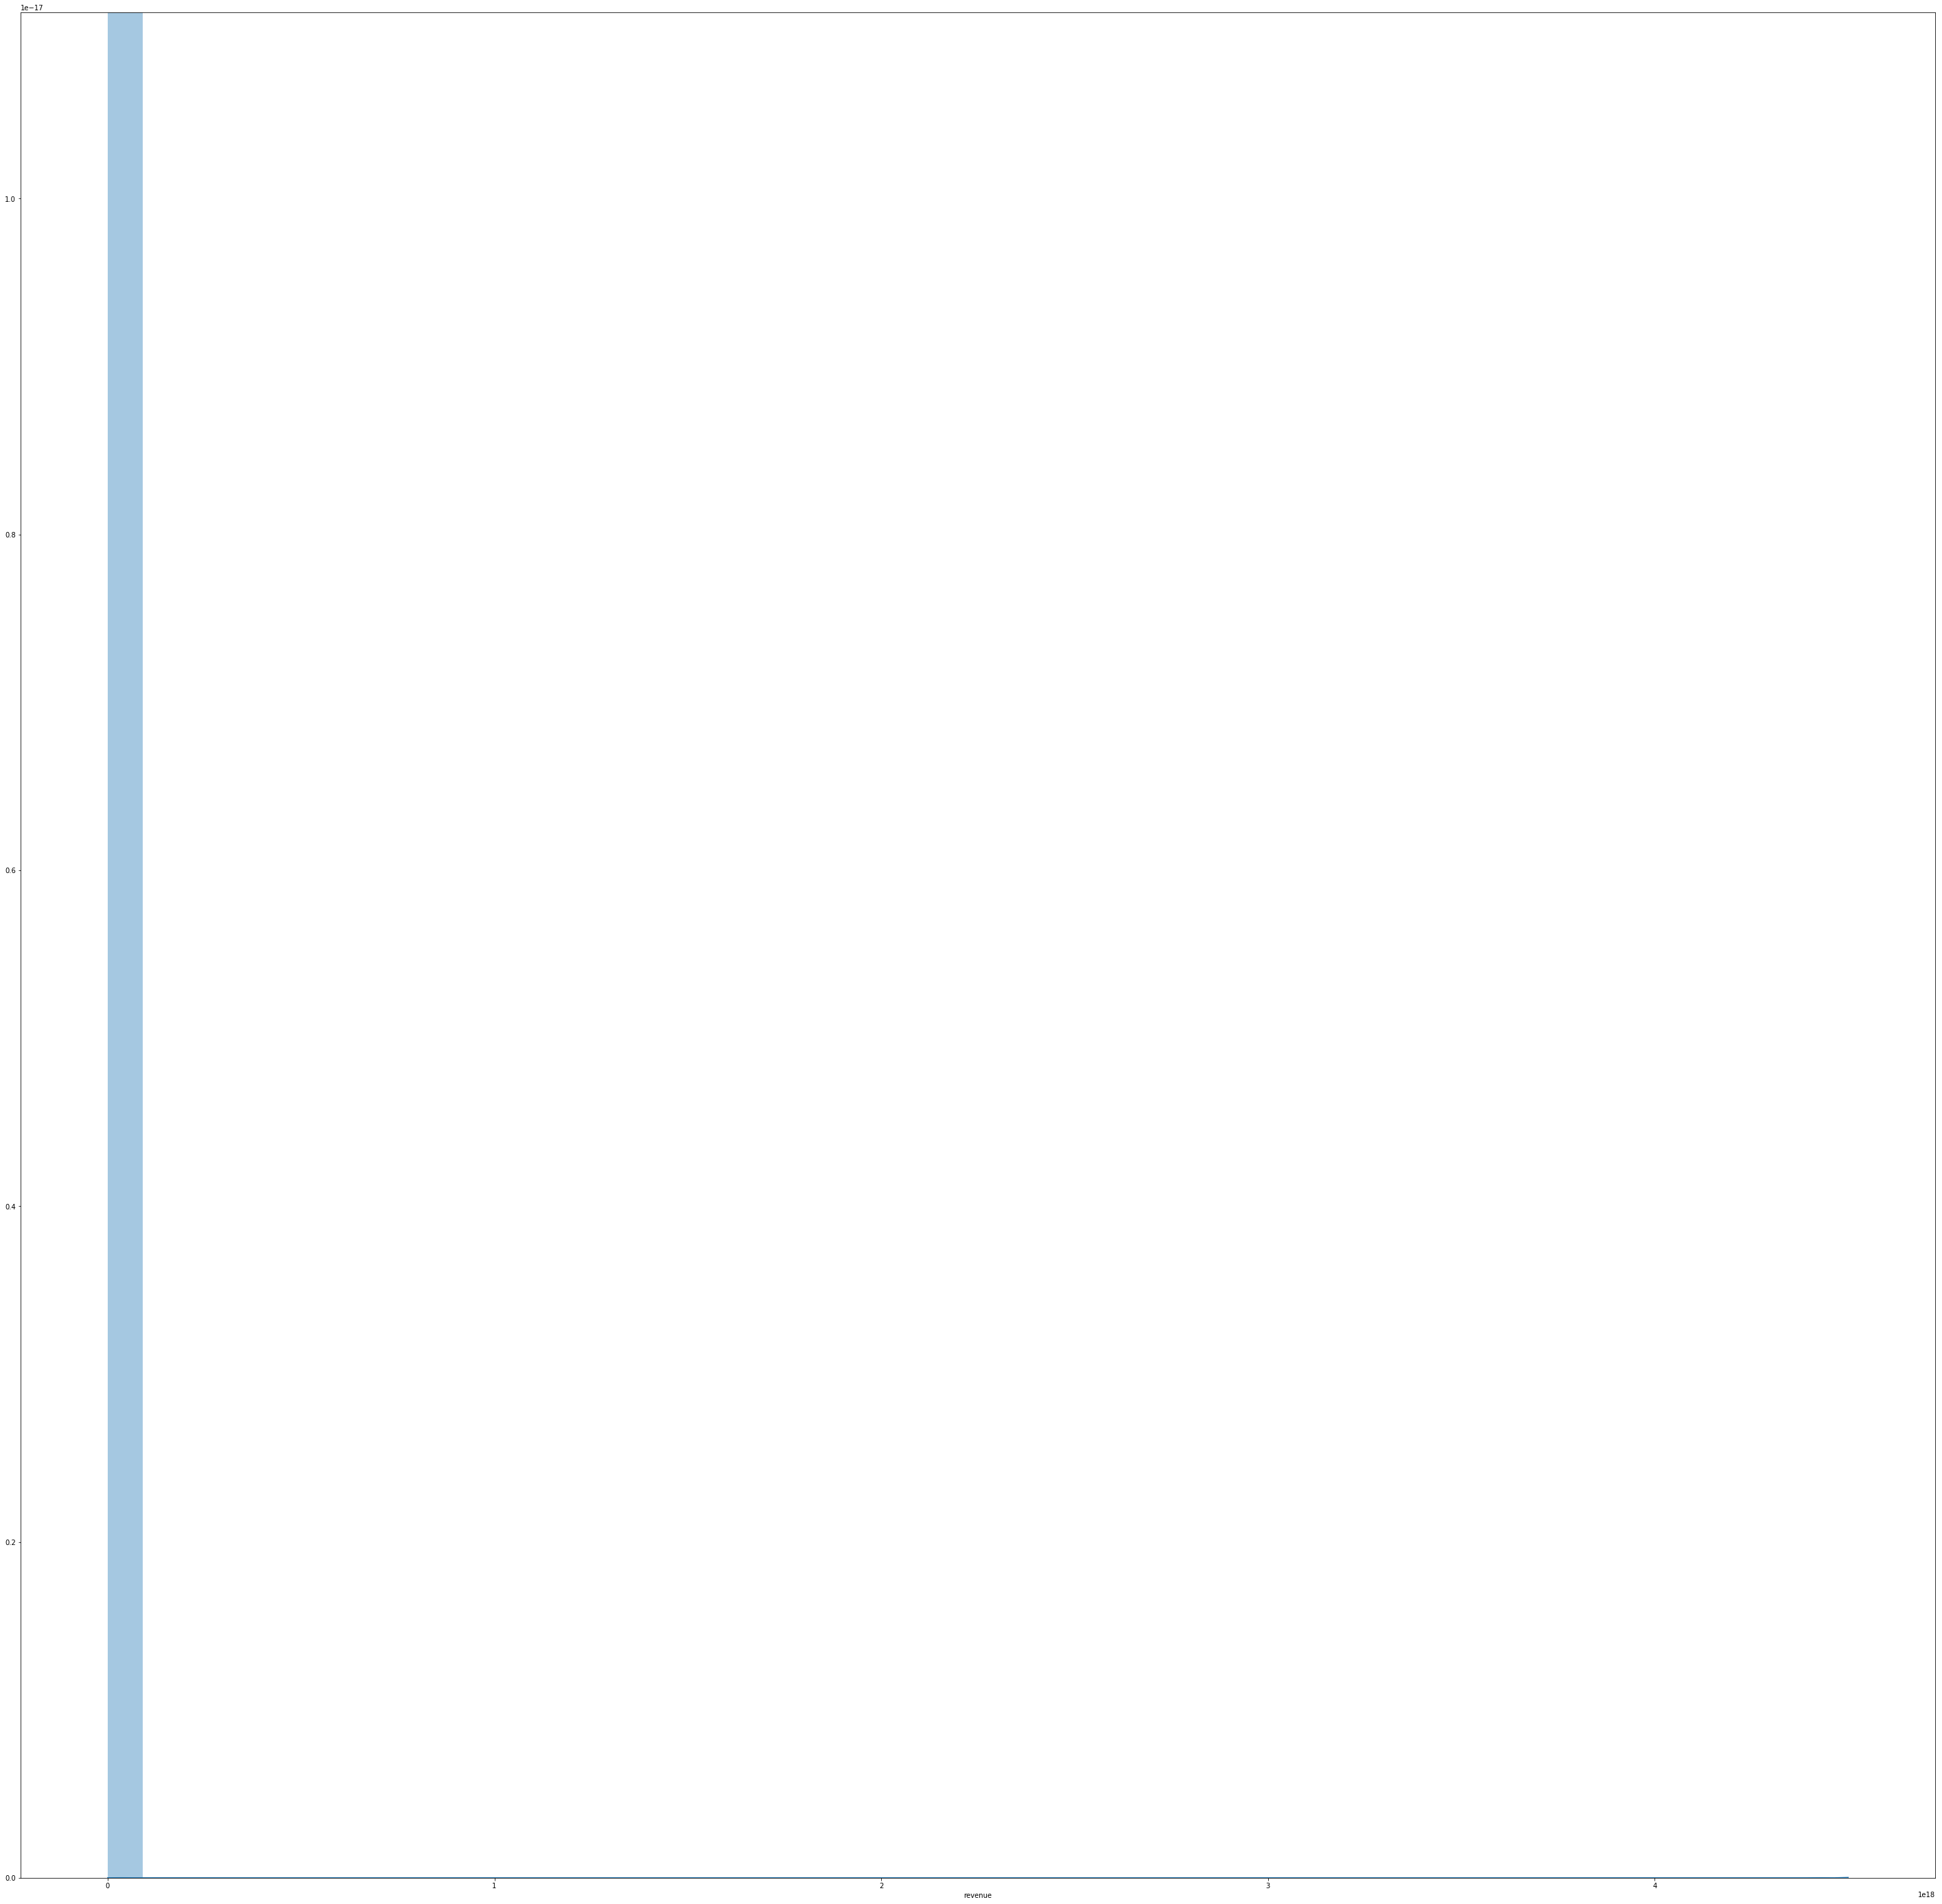

In [98]:
# histogram
sns.distplot(df['revenue']);

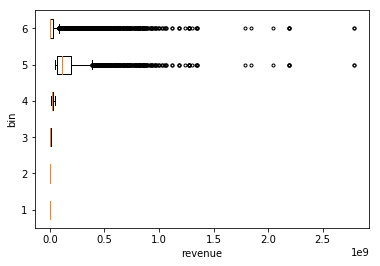

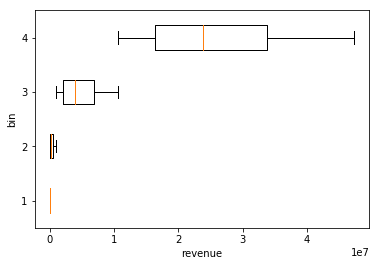

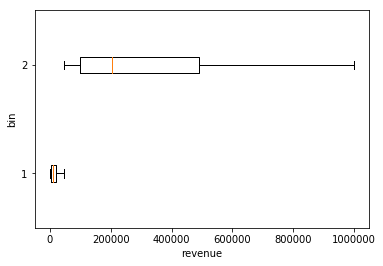

In [14]:
# Binning Revenue
revenuearray = df[['revenue']].copy()
revenuearray = revenuearray.values.tolist()
revenuearray = [j for sub in revenuearray for j in sub]
revenuearray.sort()
# print(revenuearray)

length = len(revenuearray)
# print(length)
indexrange = []
binsize = int(length/5)
minvalue=0
lastvalue=0

for i in range(0,5): #5 bins
    minvalue = i * binsize
    if (lastvalue == 0):
        print()
        lastvalue = (i+1)*binsize-1
        indexrange.append(minvalue)
    else:
        for j in range(0, binsize):
            if (revenuearray[minvalue + j] != revenuearray[lastvalue]):
                lastvalue = (i+1)*binsize-1
                indexrange.append(minvalue + j)
                break

# print(indexrange)
bin1 = revenuearray[indexrange[0]:indexrange[1]]
bin2 = revenuearray[indexrange[1]:indexrange[2]]
bin3 = revenuearray[indexrange[2]:indexrange[3]+2]
bin4 = revenuearray[indexrange[3]+2:indexrange[4]+2]
bin5 = revenuearray[indexrange[4]+2:]

# Use the following print statements to adjust and even out the bins manually:
# arrayrange = [[bin1[0],bin1[len(bin1)-1]], [bin2[0],bin2[len(bin2)-1]], [bin3[0],bin3[len(bin3)-1]], [bin4[0],bin4[len(bin4)-1]], [bin5[0],bin5[len(bin5)-1]]]
# print(arrayrange)

# print(len(bin1))
# print(len(bin2))
# print(len(bin3))
# print(len(bin4))
# print(len(bin5))

# print(bin1)
# print("-----")
# print(bin2)
# print("-----")
# print(bin3)
# print("-----")
# print(bin4)
# print("-----")
# print(bin5)

# Visualising spread of bins (bin 5 largest range > bin 1 smallest range):
revenue_bins = [bin1, bin2, bin3, bin4, bin5[:len(bin5)-2], revenuearray[:len(revenuearray)-2]] #remove largest outlier for plot to show

fig, ax = plt.subplots()
pos = np.array(range(len(revenue_bins))) + 1
bp = ax.boxplot(revenue_bins, positions=pos, vert=False)

ax.set_xlabel('revenue')
ax.set_ylabel('bin')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

revenue_bins2 = [bin1, bin2, bin3, bin4]

fig2, ax2 = plt.subplots()
pos2 = np.array(range(len(revenue_bins2))) + 1
bp2 = ax2.boxplot(revenue_bins2, positions=pos2, vert=False)

ax2.set_xlabel('revenue')
ax2.set_ylabel('bin')
plt.setp(bp2['whiskers'], color='k', linestyle='-')
plt.setp(bp2['fliers'], markersize=3.0)
plt.show()

revenue_bins3 = [bin1, bin2]

fig3, ax3 = plt.subplots()
pos3 = np.array(range(len(revenue_bins3))) + 1
bp3 = ax3.boxplot(revenue_bins3, positions=pos3, vert=False)

ax3.set_xlabel('revenue')
ax3.set_ylabel('bin')
plt.setp(bp3['whiskers'], color='k', linestyle='-')
plt.setp(bp3['fliers'], markersize=3.0)
plt.show()

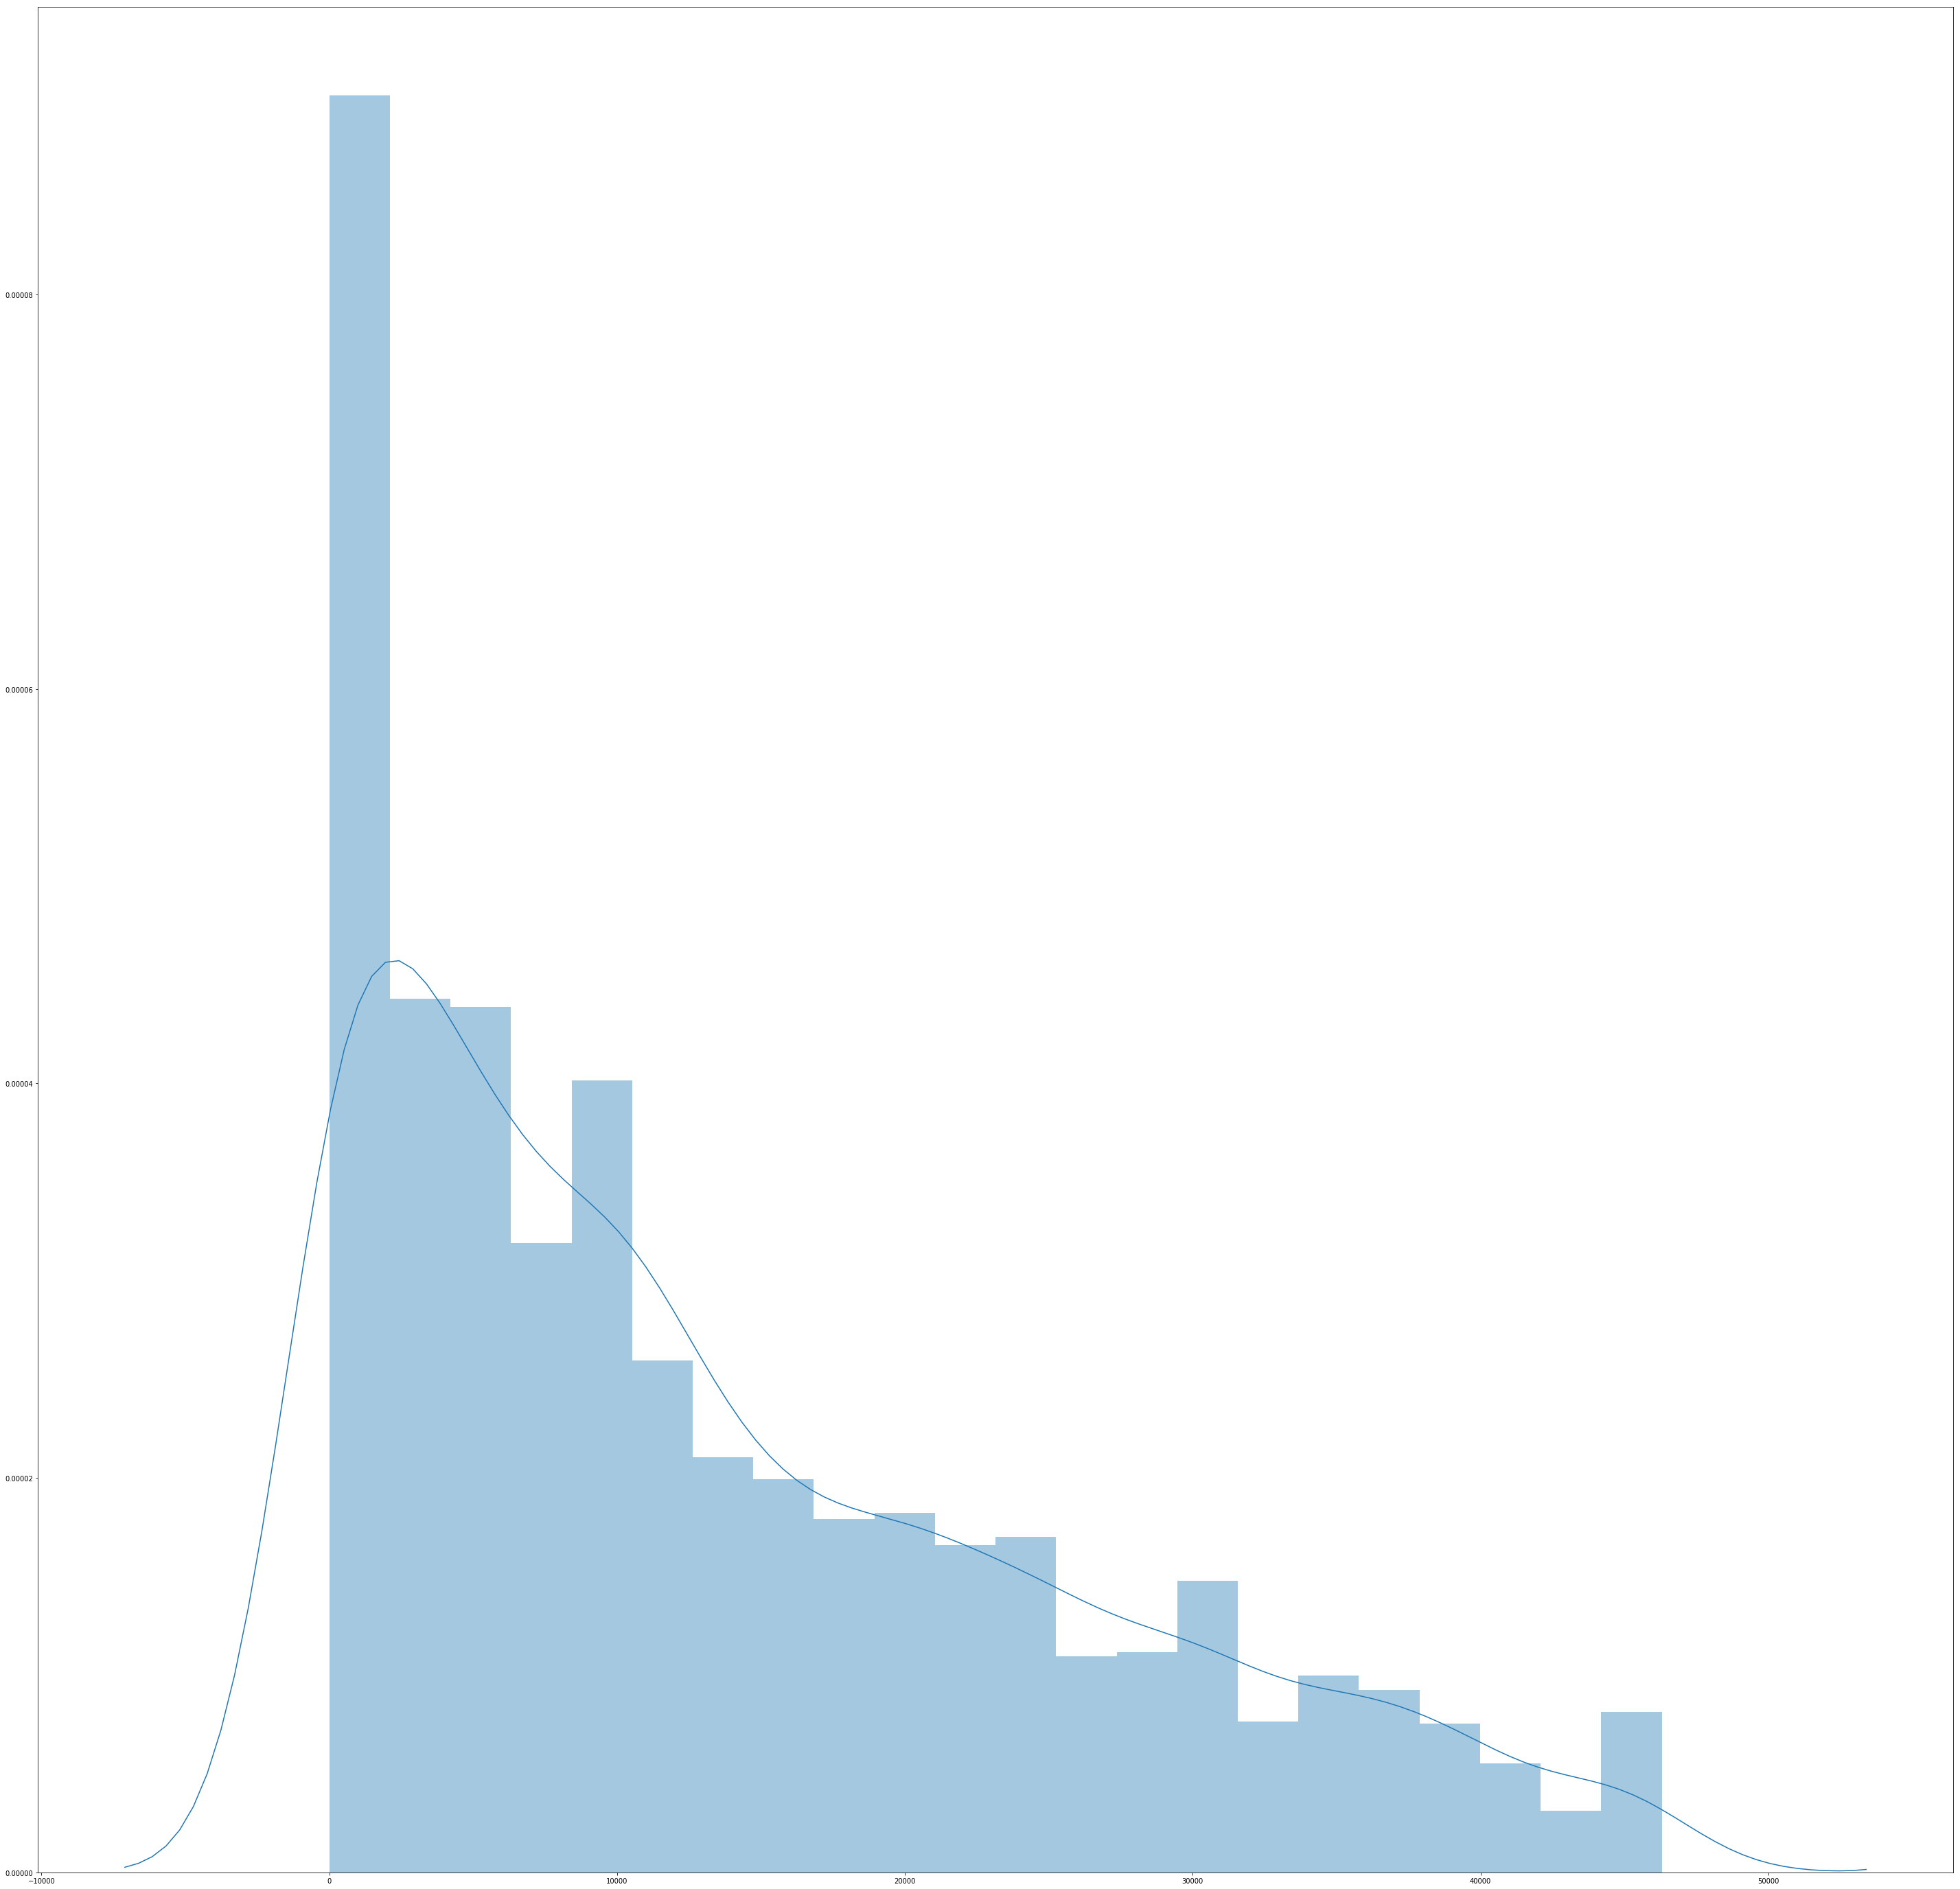

In [104]:
# histogram of each bin
sns.distplot(bin1);
# sns.distplot(bin2);
# sns.distplot(bin3);
# sns.distplot(bin4);
# sns.distplot(bin5);

In [105]:
#skewness and kurtosis - sub in values to try
print("Skewness: %f" % df['revenue'].skew())
print("Kurtosis: %f" % df['revenue'].kurt()) # peak sharpness

Skewness: 153.554551
Kurtosis: 23579.000000


In [15]:
# Outlier detection method (3 sd)
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# Outlier detection
outlier_datapoints = detect_outlier(df['revenue'])
print(outlier_datapoints)
print("revenue")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['revenue']))

outlier_datapoints1 = detect_outlier(df['budget'])
# print(outlier_datapoints1)
print("budget")
print("Number of Outliers: %d" % len(outlier_datapoints1))
print("Number of Data Points: %d" % len(df['budget']))

outlier_datapoints2 = detect_outlier(df['runtime'])
# print(outlier_datapoints2)
print("runtime")
print("Number of Outliers: %d" % len(outlier_datapoints2))
print("Number of Data Points: %d" % len(df['runtime']))

outlier_datapoints3 = detect_outlier(df['weighted_rating'])
# print(outlier_datapoints3)
print("weighted_rating")
print("Number of Outliers: %d" % len(outlier_datapoints3))
print("Number of Data Points: %d" % len(df['weighted_rating']))

[4.5e+18]
revenue
Number of Outliers: 1
Number of Data Points: 23579
budget
Number of Outliers: 340
Number of Data Points: 23579
runtime
Number of Outliers: 341
Number of Data Points: 23579
weighted_rating
Number of Outliers: 728
Number of Data Points: 23579


In [16]:
print(outlier_datapoints[0])
df_out = df[df.revenue != outlier_datapoints[0]]

df_out['revenue'].describe()
# df['revenue'].describe()

4.5e+18


count    2.357800e+04
mean     4.118401e+07
std      1.105546e+08
min      1.000000e+00
25%      1.000000e+05
50%      3.840800e+06
75%      3.382124e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [23]:
print(df['year'].describe())
df_out = df_out[df_out.year >= 1980 ]

print(df_out.count())

count    22561.000000
mean      1999.368955
std         19.845593
min       1887.000000
25%       1992.000000
50%       2006.000000
75%       2014.000000
max       2029.000000
Name: year, dtype: float64
budget                 19560
revenue                19560
weekday                19560
day                    19560
month                  19560
year                   19560
runtime                18041
vote_average           19560
vote_count             19560
weighted_rating        19560
id                     19560
log_revenue            19560
log_budget             19560
log_runtime            18041
log_vote_average       19560
log_vote_count         19560
log_weighted_rating    19560
dtype: int64


In [24]:
# Binning Revenue
revenuearray = df_out[['revenue']].copy()
revenuearray = revenuearray.values.tolist()
revenuearray = [j for sub in revenuearray for j in sub]
revenuearray.sort()
# print(revenuearray)

length = len(revenuearray)
# print(length)
indexrange = []
binsize = int(length/5)
minvalue=0
lastvalue=0

for i in range(0,5): #5 bins
    minvalue = i * binsize
    if (lastvalue == 0):
        print()
        lastvalue = (i+1)*binsize-1
        indexrange.append(minvalue)
    else:
        for j in range(0, binsize):
            if (revenuearray[minvalue + j] != revenuearray[lastvalue]):
                lastvalue = (i+1)*binsize-1
                indexrange.append(minvalue + j)
                break

# print(indexrange)
bin1 = revenuearray[indexrange[0]:indexrange[1]]
bin2 = revenuearray[indexrange[1]:indexrange[2]]
bin3 = revenuearray[indexrange[2]:indexrange[3]]
bin4 = revenuearray[indexrange[3]:indexrange[4]]
bin5 = revenuearray[indexrange[4]:]

# Use the following print statements to adjust and even out the bins manually:
arrayrange = [[bin1[0],bin1[len(bin1)-1]], [bin2[0],bin2[len(bin2)-1]], [bin3[0],bin3[len(bin3)-1]], [bin4[0],bin4[len(bin4)-1]], [bin5[0],bin5[len(bin5)-1]]]
print(arrayrange)

print(len(bin1))
print(len(bin2))
print(len(bin3))
print(len(bin4))
print(len(bin5))

# print(bin1)
# print("-----")
# print(bin2)
# print("-----")
# print(bin3)
# print("-----")
# print(bin4)
# print("-----")
# print(bin5)


[[1.0, 39500.0], [39600.0, 814500.0], [817192.0, 9595697.0], [9600000.0, 45892212.0], [45916769.0, 2787965087.0]]
3914
3915
3908
3911
3912


In [25]:
# Log for certain columns only
df_out['log_revenue'] = np.log(df_out['revenue'])
df_out['log_budget'] = np.log(df_out['budget'])
df_out['log_runtime'] = np.log(df_out['runtime'])
df_out['log_vote_average'] = np.log(df_out['vote_average'])
df_out['log_vote_count'] = np.log(df_out['vote_count'])
df_out['log_weighted_rating'] = np.log(df_out['weighted_rating'])

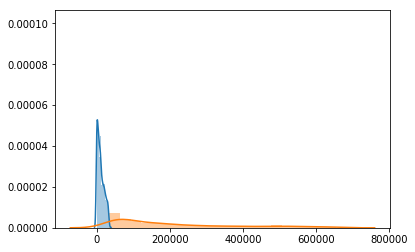

In [165]:
# Ignore overlapping part of line
sns.distplot(bin1);
sns.distplot(bin2);
# sns.distplot(bin3);
# sns.distplot(bin4);
# sns.distplot(bin5);

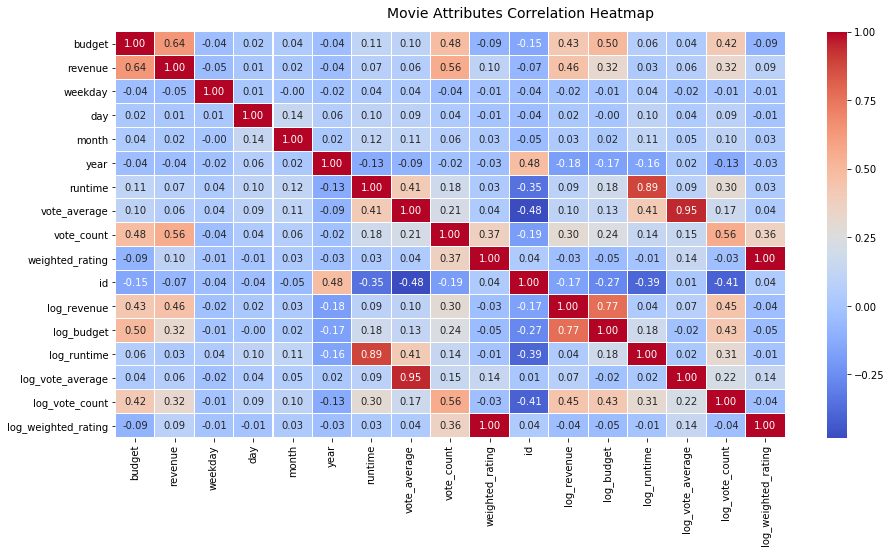

In [26]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df_out.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

In [27]:
# Per revenue bin, obtain chunked df
df1 = df_out.loc[df_out['revenue'].isin(bin1)]
print(df1.shape)
df2 = df_out.loc[df_out['revenue'].isin(bin2)]
print(df2.shape)
df3 = df_out.loc[df_out['revenue'].isin(bin3)]
print(df3.shape)
df4 = df_out.loc[df_out['revenue'].isin(bin4)]
print(df4.shape)
df5 = df_out.loc[df_out['revenue'].isin(bin5)]
print(df5.shape)

(3914, 17)
(3915, 17)
(3908, 17)
(3911, 17)
(3912, 17)


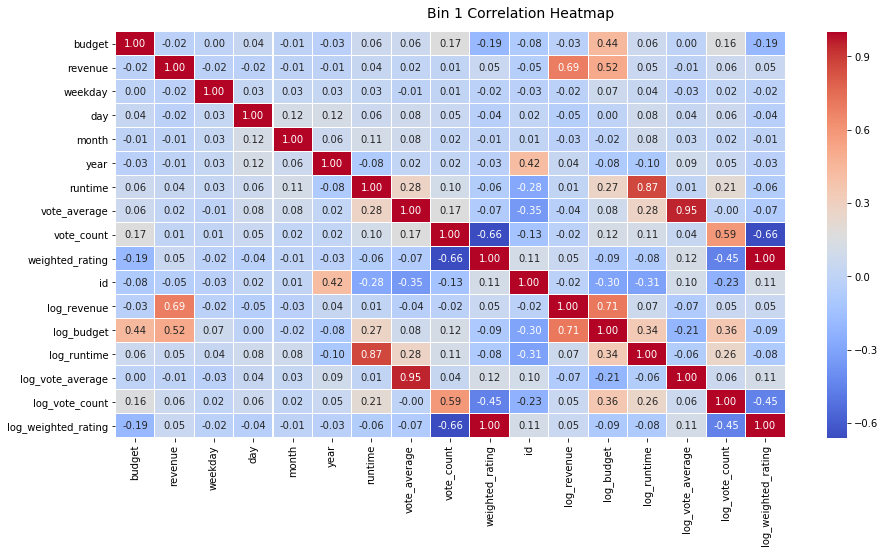

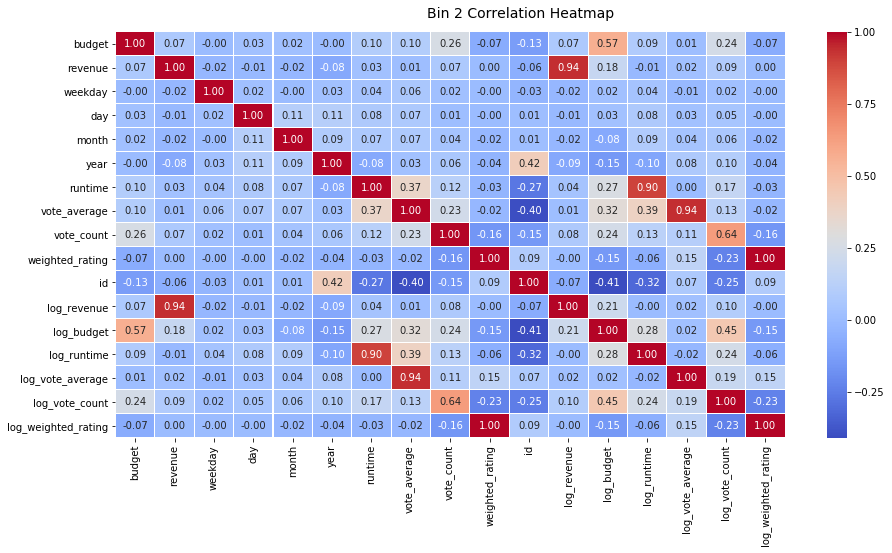

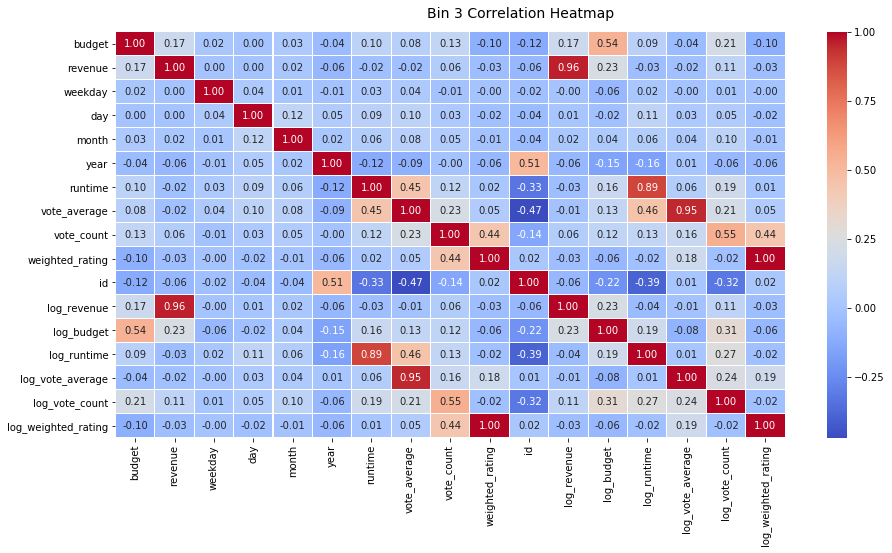

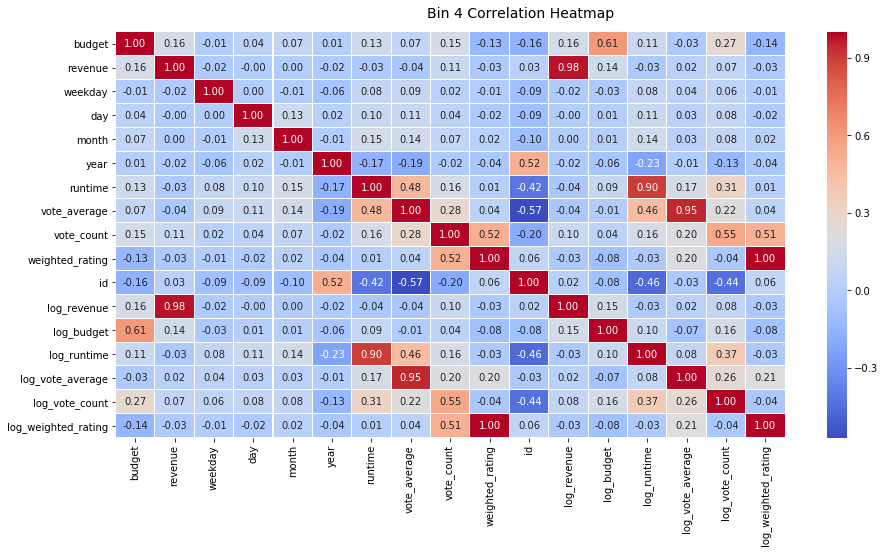

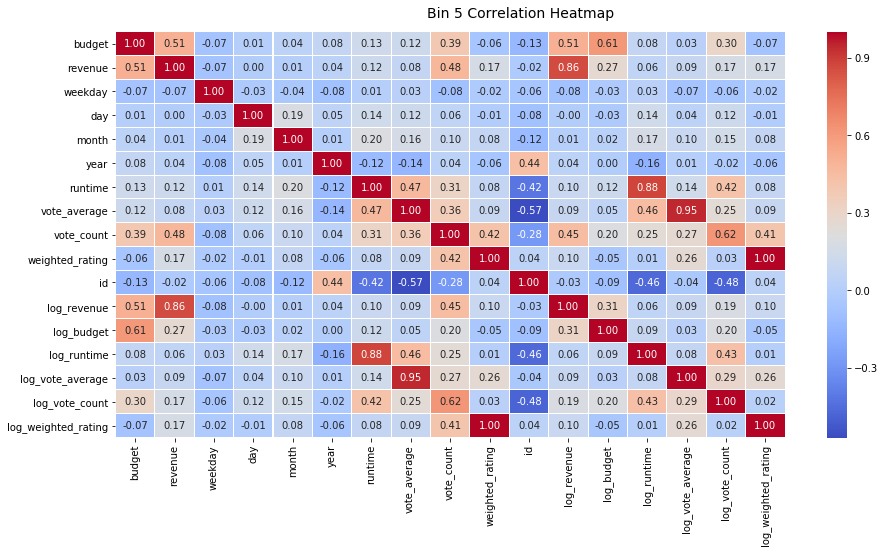

In [28]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 1 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df2.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 2 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df3.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 3 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df4.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 4 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df5.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 5 Correlation Heatmap', fontsize=14)

In [29]:
# Assign class labels (bin)
df_out.loc[df_out['revenue'].isin(bin1), 'bin'] = 1
df_out.loc[df_out['revenue'].isin(bin2), 'bin'] = 2
df_out.loc[df_out['revenue'].isin(bin3), 'bin'] = 3
df_out.loc[df_out['revenue'].isin(bin4), 'bin'] = 4
df_out.loc[df_out['revenue'].isin(bin5), 'bin'] = 5

print(df_out)
# df_out = df_out.drop("bin", axis=1) # In case need to drop column

           budget      revenue  weekday   day  month    year  runtime  \
0             0.0      11100.0      5.0   6.0   10.0  2017.0    120.0   
1      17000000.0   14899417.0      6.0   6.0    4.0  2002.0      NaN   
2             0.0     450500.0      2.0  10.0   10.0  2017.0     20.0   
4             0.0   17140600.0      3.0  14.0    6.0  2017.0     21.0   
5       3500000.0   95330493.0      7.0   8.0   10.0  2017.0     90.0   
6             0.0       9300.0      3.0  11.0   10.0  2017.0      NaN   
13     85000000.0  252712101.0      5.0  29.0    8.0  2014.0    112.0   
15            0.0   20764500.0      4.0  29.0    3.0  2018.0     90.0   
16     50000000.0  137944327.0      3.0  21.0   11.0  2018.0    130.0   
17            0.0     735992.0      4.0   1.0    1.0  1981.0      8.0   
20            0.0      87465.0      4.0   7.0   12.0  2017.0     93.0   
21            0.0    9595697.0      2.0  10.0   10.0  2000.0     50.0   
23            0.0    4152000.0      6.0  25.0    1.

In [30]:
df_out.to_pickle("explored_data")

In [31]:
# TO USE DATAFRAME FILES

test = pd.read_pickle("explored_data")
print(test.columns.values)
print(test.dtypes)
print(test)


['budget' 'revenue' 'weekday' 'day' 'month' 'year' 'runtime'
 'vote_average' 'vote_count' 'weighted_rating' 'id' 'log_revenue'
 'log_budget' 'log_runtime' 'log_vote_average' 'log_vote_count'
 'log_weighted_rating' 'bin']
budget                 float64
revenue                float64
weekday                float64
day                    float64
month                  float64
year                   float64
runtime                float64
vote_average           float64
vote_count             float64
weighted_rating        float64
id                     float64
log_revenue            float64
log_budget             float64
log_runtime            float64
log_vote_average       float64
log_vote_count         float64
log_weighted_rating    float64
bin                    float64
dtype: object
           budget      revenue  weekday   day  month    year  runtime  \
0             0.0      11100.0      5.0   6.0   10.0  2017.0    120.0   
1      17000000.0   14899417.0      6.0   6.0    4.0  2002.0 